In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate genotype data (100 individuals, 500 SNPs)
np.random.seed(42)
X = np.random.randint(0, 3, size=(100, 500))  # 100 individuals, 500 SNPs

# Simulate the effect sizes for 500 SNPs (random for demonstration)
effect_sizes = np.random.normal(0, 0.1, 500)

# Compute Polygenic Risk Score (PRS) for each individual
prs = X @ effect_sizes  # Matrix multiplication

# Convert PRS into probabilities using the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

probability = sigmoid(prs)  # Probabilities from PRS

# Generate disease outcomes (1 = stroke, 0 = no stroke)
y = np.random.binomial(1, probability)

In [11]:
# Add the bias term (column of ones) to X
X_bias = np.c_[np.ones((X.shape[0], 1)), X]  # Add a column of ones to X (bias term)

In [12]:
def compute_cost_regularized(X, y, theta, lambda_reg):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))  # Predictions (probabilities)
    cost = - (1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))  # Logistic loss
    
    # Add regularization term (skip the first term since it's the bias term)
    regularization = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))  # L2 regularization
    return cost + regularization

In [13]:
def gradient_descent_regularized(X, y, theta, learning_rate, iterations, lambda_reg):
    m = len(y)
    cost_history = []  # To store cost at each iteration
    
    for _ in range(iterations):
        predictions = sigmoid(np.dot(X, theta))  # Predictions
        gradient = np.dot(X.T, (predictions - y)) / m  # Gradient of the cost function
        gradient[1:] += (lambda_reg / m) * theta[1:]  # Add regularization to gradient (skip bias term)
        
        theta -= learning_rate * gradient  # Update theta
        cost_history.append(compute_cost_regularized(X, y, theta, lambda_reg))  # Track the cost
    
    return theta, cost_history

In [14]:
learning_rates = [0.001, 0.01, 0.1]
lambda_reg_values = [0.01, 0.1, 1, 10]

# Initialize theta (weights) to zeros
theta_initial = np.zeros(X_bias.shape[1])

# Run grid search for different combinations of learning rates and lambda values
for lr in learning_rates:
    for lambda_reg in lambda_reg_values:
        theta_final, cost_history = gradient_descent_regularized(X_bias, y, theta_initial, lr, 1000, lambda_reg)
        print(f"Learning Rate: {lr}, Lambda: {lambda_reg}, Final Cost: {cost_history[-1]}")

Learning Rate: 0.001, Lambda: 0.01, Final Cost: 0.2747343997556533
Learning Rate: 0.001, Lambda: 0.1, Final Cost: 0.16355682878294087
Learning Rate: 0.001, Lambda: 1, Final Cost: 0.12222094232307489
Learning Rate: 0.001, Lambda: 10, Final Cost: 0.17894952343619747
Learning Rate: 0.01, Lambda: 0.01, Final Cost: 0.026098535461282282
Learning Rate: 0.01, Lambda: 0.1, Final Cost: 0.017781379540572434
Learning Rate: 0.01, Lambda: 1, Final Cost: 0.042563852193062045
Learning Rate: 0.01, Lambda: 10, Final Cost: 0.17551250438567745
Learning Rate: 0.1, Lambda: 0.01, Final Cost: 0.0017385824971305544
Learning Rate: 0.1, Lambda: 0.1, Final Cost: 0.009408140631599695
Learning Rate: 0.1, Lambda: 1, Final Cost: 0.0425749199001993
Learning Rate: 0.1, Lambda: 10, Final Cost: 0.82408553657398


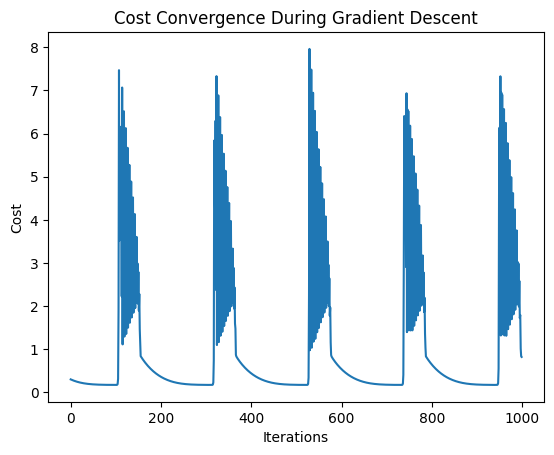

In [15]:
# Plot cost convergence during training
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Convergence During Gradient Descent")
plt.show()